In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# data: https://github.com/gastonstat/CreditScoring/blob/master/CreditScoring.csv

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [6]:
status_values = {
    1: 'ok',
    2: 'default',
    3: 'unk'
}

df.status = df.status.map(status_values)

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [14]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [15]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [16]:
del df_train['status']
del df_val['status']
del df_test['status']

In [17]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
4,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no,partime,35,45.0,0.0,0.0,400,904
2669,5,rent,60,47,single,yes,fixed,46,106.0,8500.0,0.0,2500,2664
2670,23,rent,24,47,single,no,fixed,44,86.0,0.0,0.0,350,975
2671,5,owner,60,58,married,no,freelance,45,93.0,45000.0,0.0,1500,2090


# 6.3 Decision Trees

In [18]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [19]:
xi = df_train.loc[0].to_dict()

In [20]:
assess_risk(xi)

'ok'

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [22]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[:5]

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 57.0,
  'assets': 12000.0,
  'debt': 0.0,
  'amount': 2500,
  'price': 3559},
 {'seniority': 5,
  'home': 'rent',
  'time': 48,
  'age': 30,
  'marital': 'separated',
  'records': 'yes',
  'job': 'partime',
  'expenses': 39,
  'income': 41.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1300,
  'price': 1600},
 {'seniority': 15,
  'home': 'owner',
  'time': 60,
  'age': 32,
  'marital': 'divorced',
  'records': 'no',
  'job': 'freelance',
  'expenses': 35,
  'income': 0.0,
  'assets': 6000.0,
  'debt': 3300.0,
  'amount': 1550,
  'price': 1612},
 {'seniority': 2,
  'home': 'rent',
  'time': 12,
  'age': 47,
  'marital': 'married',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 103,
  'income': 426.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 350,
  'price': 450},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,


In [23]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [24]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [27]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [28]:
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0.])

In [29]:
roc_auc_score(y_val, y_pred)

0.6613400660082325

In [30]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

In [31]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc )

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print('val: ', auc )

train:  0.7017132266649385
val:  0.6876073869887143


In [33]:
from sklearn.tree import export_text

In [34]:
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- class: 1
|--- feature_25 >  0.50
|   |--- feature_26 <= 6.50
|   |   |--- class: 1
|   |--- feature_26 >  6.50
|   |   |--- class: 0



In [35]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



# 6.4 Decision Tree Learning Algorithm

In [36]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [37]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [38]:
Ts = [2000, 3000, 4000, 5000, 8000]

In [39]:
from IPython.display import display

In [40]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    display(df_right)
    print()

2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


In [41]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
display(df_right)

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


In [42]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [43]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [44]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [45]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


# 6.5 Decision Tree Parameter Tuning

In [46]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:

    dt = DecisionTreeClassifier(max_depth = d)

    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(d,round(auc, 3))


1 0.613
2 0.688
3 0.763
4 0.779
5 0.784
6 0.778
10 0.71
15 0.67
20 0.668
None 0.664


In [47]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)

        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        print(d, s, round(auc, 3))

scores

4 1 0.779
4 2 0.779
4 5 0.779
4 10 0.774
4 15 0.771
4 20 0.784
4 100 0.767
4 200 0.765
4 500 0.671
5 1 0.783
5 2 0.782
5 5 0.786
5 10 0.783


5 15 0.78
5 20 0.785
5 100 0.786
5 200 0.778
5 500 0.671
6 1 0.772
6 2 0.776
6 5 0.787
6 10 0.792
6 15 0.795
6 20 0.799
6 100 0.793
6 200 0.789
6 500 0.671


[(4, 1, 0.77933905239867),
 (4, 2, 0.77933905239867),
 (4, 5, 0.7787148172412515),
 (4, 10, 0.7738321858119384),
 (4, 15, 0.7707017392056762),
 (4, 20, 0.7835171015710949),
 (4, 100, 0.7669872309917305),
 (4, 200, 0.7649291091360833),
 (4, 500, 0.6713680020766635),
 (5, 1, 0.7834892891135861),
 (5, 2, 0.7818452638475135),
 (5, 5, 0.7863107084141954),
 (5, 10, 0.7831988034462725),
 (5, 15, 0.7802012385814412),
 (5, 20, 0.7852291128444109),
 (5, 100, 0.786425048517287),
 (5, 200, 0.7779546100693457),
 (5, 500, 0.6713680020766635),
 (6, 1, 0.7716720849454257),
 (6, 2, 0.7755720095427632),
 (6, 5, 0.7868051521032399),
 (6, 10, 0.7921945883138235),
 (6, 15, 0.7947317024932322),
 (6, 20, 0.7990426334070879),
 (6, 100, 0.793276183883608),
 (6, 200, 0.788792197678587),
 (6, 500, 0.6713680020766635)]

In [48]:
columns=['max_depth', 'min_samples_leaf', 'auc']

df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
23,6,20,0.799043
22,6,15,0.794732
24,6,100,0.793276
21,6,10,0.792195
25,6,200,0.788792
20,6,5,0.786805
15,5,100,0.786425
11,5,5,0.786311
14,5,20,0.785229
5,4,20,0.783517


In [49]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot

auc                    
max_depth                4         5         6
min_samples_leaf                              
1                 0.779339  0.783489  0.771672
2                 0.779339  0.781845  0.775572
5                 0.778715  0.786311  0.786805
10                0.773832  0.783199  0.792195
15                0.770702  0.780201  0.794732
20                0.783517  0.785229  0.799043
100               0.766987  0.786425  0.793276
200               0.764929  0.777955  0.788792
500               0.671368  0.671368  0.671368

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

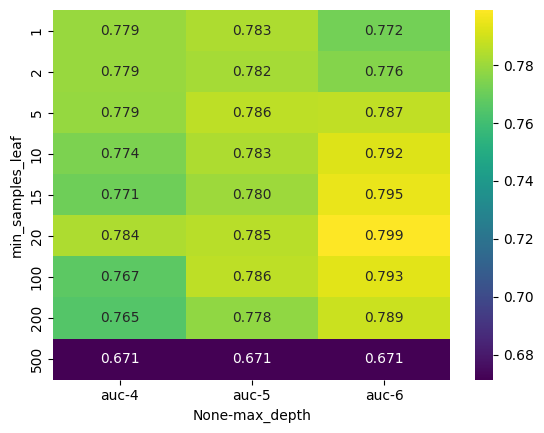

In [50]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f', cmap='viridis')

# 6.6 Ensembles and Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [53]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [54]:
roc_auc_score(y_val, y_pred)

0.7898799737944846

In [55]:
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [56]:
scores = []


for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [57]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores.head()

,n_estimators,auc
0,10,0.813555
1,20,0.834816
2,30,0.832822
3,40,0.830409
4,50,0.832084


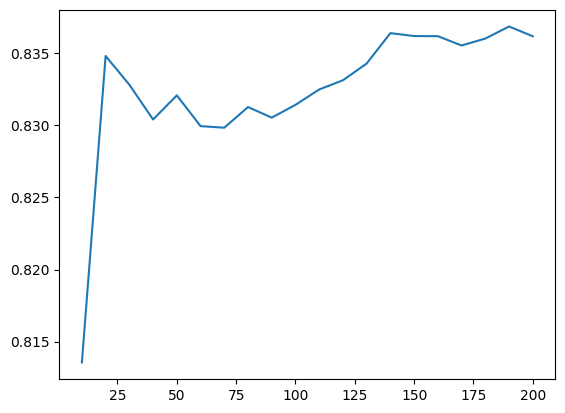

In [58]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [59]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [60]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.816836
1,5,20,0.822319
2,5,30,0.821957
3,5,40,0.824540
4,5,50,0.828756


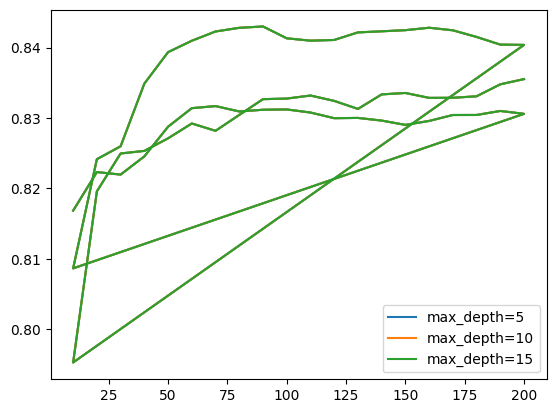

In [61]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_scores.n_estimators, df_scores.auc, label='max_depth=%d' % d)

plt.legend()


In [62]:
max_depth = 10

In [63]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=max_depth,
            min_samples_leaf=s,
            random_state=1
        )

        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [64]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.808641
1,1,20,0.824145
2,1,30,0.825974
3,1,40,0.834874
4,1,50,0.839343


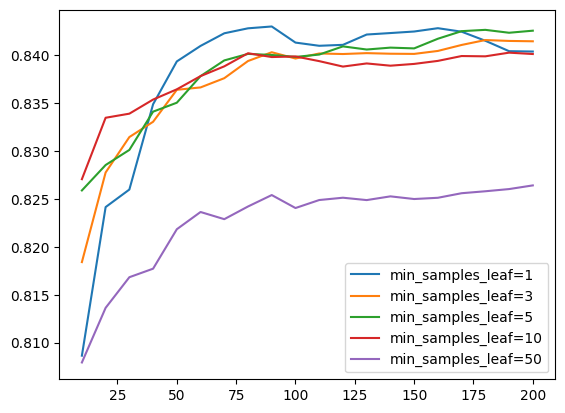

In [65]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_samples_leaf=%d' %s)

plt.legend()

In [66]:
min_samples_leaf = 3

In [67]:
rf = RandomForestClassifier(
    n_estimators=n,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=1
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

# 6.7 Gradient Boosting and XGBoost

In [68]:
# !pip install xgboost

import xgboost as xgb

In [69]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [70]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [71]:
y_pred = model.predict(dval)

In [72]:
roc_auc_score(y_val, y_pred)

0.8240583937996762

In [73]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [74]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=200,
                  evals=watchlist)



In [75]:
s = output.stdout

In [76]:
s.split('\n')

['[0]\ttrain-auc:0.85926\tval-auc:0.80044',
 '[1]\ttrain-auc:0.88496\tval-auc:0.80815',
 '[2]\ttrain-auc:0.89680\tval-auc:0.81251',
 '[3]\ttrain-auc:0.90577\tval-auc:0.81408',
 '[4]\ttrain-auc:0.91731\tval-auc:0.81780',
 '[5]\ttrain-auc:0.92307\tval-auc:0.81749',
 '[6]\ttrain-auc:0.92871\tval-auc:0.82072',
 '[7]\ttrain-auc:0.93726\tval-auc:0.82226',
 '[8]\ttrain-auc:0.94062\tval-auc:0.82313',
 '[9]\ttrain-auc:0.94323\tval-auc:0.82406',
 '[10]\ttrain-auc:0.94811\tval-auc:0.82719',
 '[11]\ttrain-auc:0.95163\tval-auc:0.82643',
 '[12]\ttrain-auc:0.95358\tval-auc:0.82783',
 '[13]\ttrain-auc:0.95659\tval-auc:0.82597',
 '[14]\ttrain-auc:0.95833\tval-auc:0.82581',
 '[15]\ttrain-auc:0.96108\tval-auc:0.82606',
 '[16]\ttrain-auc:0.96384\tval-auc:0.82493',
 '[17]\ttrain-auc:0.96631\tval-auc:0.82475',
 '[18]\ttrain-auc:0.96759\tval-auc:0.82528',
 '[19]\ttrain-auc:0.97008\tval-auc:0.82513',
 '[20]\ttrain-auc:0.97269\tval-auc:0.82514',
 '[21]\ttrain-auc:0.97391\tval-auc:0.82475',
 '[22]\ttrain-auc:0.

In [77]:
line = s.split('\n')[0]

In [78]:
num_iter, train_auc, val_auc = line.split('\t')

In [79]:
int(num_iter.strip('[]'))

0

In [80]:
float(train_auc.split(':')[1])

0.85926

In [81]:
float(val_auc.split(':')[1])

0.80044

In [82]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [83]:
df_score = parse_xgb_output(output)

In [84]:
df_score

,num_iter,train_auc,val_auc
0,0,0.85926,0.80044
1,1,0.88496,0.80815
2,2,0.89680,0.81251
3,3,0.90577,0.81408
4,4,0.91731,0.81780
...,...,...,...
195,195,1.00000,0.81280
196,196,1.00000,0.81293
197,197,1.00000,0.81274
198,198,1.00000,0.81287


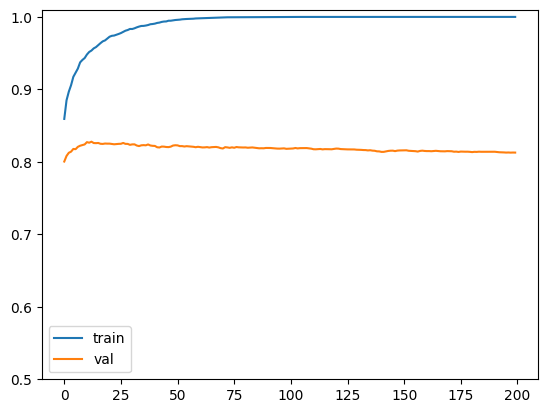

In [85]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.ylim(0.5)
plt.legend()

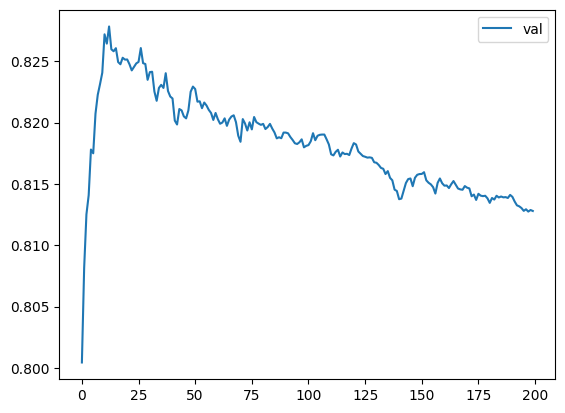

In [87]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# 6.8 XGBoost Parameter Tuning

In [123]:
scores = {}


In [124]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [125]:
scores = {}


In [126]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [127]:
scores = {}


In [128]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [129]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [130]:
del scores['max_depth=10']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


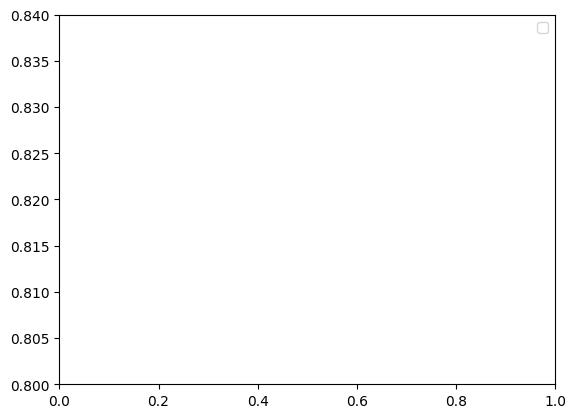

In [131]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

In [132]:
scores = {}


In [133]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [134]:

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

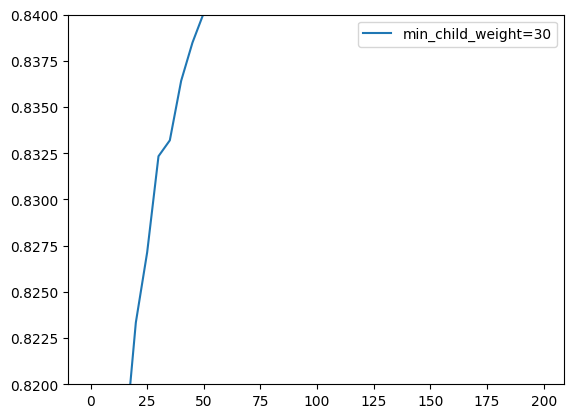

In [135]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

In [136]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# 6.9 Selecting the Final Model